In [ ]:
# To install any libraries 
# py -m pip install <<libray Name>>

In [21]:
# import pandas lib as pd
import pandas as pd
pd.set_option("display.precision", 2)
#df1 = pd.read_csv(r'C:\Users\dpandian\Documents\DataForDS.csv')
df1 = pd.read_csv(r'C:\Users\dpandian\Documents\on_demand.csv')
# Get Row count of the DF
count_row = df1.shape[0]  # Gives number of rows
count_col = df1.shape[1]  # Gives number of columns

In [22]:

#_index	_type	_id	_version	_score	_source.cluster.node	_source.cluster.name	_source.agent.ip	_source.agent.name	_source.agent.id	
# _source.manager.name	_source.rule.mail	_source.rule.level	_source.rule.pci_dss	_source.rule.hipaa	_source.rule.tsc	_source.rule.description	
# _source.rule.groups	_source.rule.nist_800_53	_source.rule.gdpr	_source.rule.firedtimes	_source.rule.mitre.technique	_source.rule.mitre.id	
# _source.rule.mitre.tactic	_source.rule.id	_source.rule.gpg13	_source.decoder.name	_source.full_log	_source.input.type	_source.@timestamp	
# _source.location	_source.id	_source.timestamp	_source.data.file	_source.data.title	_source.decoder																																																																																																			

df1.rename(
    columns={
        "_source.@timestamp": "Time",
        "_source.agent.name": "host", 
        "_source.agent.ip":"ip",
        "_source.rule.firedtimes": "firedtimes",
        "_source.rule.description": "description",
        "_source.rule.level": "rulelevel",
        "_source.rule.nist_800_53":"nist800",
        "_source.location":"location",
        "_source.rule.mitre.tactic":"mitretactic",
        "_source.rule.mitre.technique":"mitretechnique"
    },
    errors="raise",
    inplace=True
)

In [23]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df1['text_token']=df1['description'].apply(regexp.tokenize)
df1.head(3)


,_index,_type,_id,_version,_score,_source.cluster.node,_source.cluster.name,ip,host,_source.agent.id,...,_source.syscheck.uid_before,_source.syscheck.gname_before,_source.syscheck.gid_before,_source.syscheck.uname_before,_source.data.audit.euid,_source.data.audit.command,_source.data.gid,_source.data.shell,_source.data.home,text_token
0,wazuh-alerts-4.x-000001,_doc,PU_4zYkBfMO6ohwKGH9j,1,1,wazuh-manager-master,wazuh,192.168.50.63,vc-edge,1,...,,,,,,,,,,"[Ossec, agent, disconnected]"
1,wazuh-alerts-4.x-000001,_doc,Pk_4zYkBfMO6ohwKGH9j,1,1,wazuh-manager-master,wazuh,172.23.117.2,atom,2,...,,,,,,,,,,"[Ossec, agent, disconnected]"
2,wazuh-alerts-4.x-000001,_doc,EU_wzYkBfMO6ohwKeFzD,1,1,wazuh-manager-master,wazuh,192.168.50.63,vc-edge,1,...,,,,,,,,,,"[Ossec, agent, disconnected]"


In [24]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dpandian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [26]:
# Remove stopwords
df1['text_token'] = df1['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df1.head(3)

,_index,_type,_id,_version,_score,_source.cluster.node,_source.cluster.name,ip,host,_source.agent.id,...,_source.syscheck.uid_before,_source.syscheck.gname_before,_source.syscheck.gid_before,_source.syscheck.uname_before,_source.data.audit.euid,_source.data.audit.command,_source.data.gid,_source.data.shell,_source.data.home,text_token
0,wazuh-alerts-4.x-000001,_doc,PU_4zYkBfMO6ohwKGH9j,1,1,wazuh-manager-master,wazuh,192.168.50.63,vc-edge,1,...,,,,,,,,,,"[Ossec, agent, disconnected]"
1,wazuh-alerts-4.x-000001,_doc,Pk_4zYkBfMO6ohwKGH9j,1,1,wazuh-manager-master,wazuh,172.23.117.2,atom,2,...,,,,,,,,,,"[Ossec, agent, disconnected]"
2,wazuh-alerts-4.x-000001,_doc,EU_wzYkBfMO6ohwKeFzD,1,1,wazuh-manager-master,wazuh,192.168.50.63,vc-edge,1,...,,,,,,,,,,"[Ossec, agent, disconnected]"


In [27]:
#We first change the format of text_token to strings and keep only words which are longer than 2 letters
df1['text_string'] = df1['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))
df1[['host', 'description', 'text_string']].head()

,host,description,text_string
0,vc-edge,Ossec agent disconnected.,Ossec agent disconnected
1,atom,Ossec agent disconnected.,Ossec agent disconnected
2,vc-edge,Ossec agent disconnected.,Ossec agent disconnected
3,atom,Ossec agent disconnected.,Ossec agent disconnected
4,vc-edge,Ossec agent disconnected.,Ossec agent disconnected


In [28]:
nltk.download('punkt')
#Create a list of all words
all_words = ' '.join([word for word in df1['text_string']])
#Tokenize all_words
tokenized_words = nltk.tokenize.word_tokenize(all_words)
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dpandian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


FreqDist({'based': 3673, 'event': 3658, 'Host': 3650, 'anomaly': 3650, 'detection': 3650, 'rootcheck': 3650, 'changed': 2445, 'opened': 1605, 'closed': 1574, 'Integrity': 1288, ...})

In [29]:
#Now we can use our fdist dictionary to drop words which occur less than a certain amount of times ( we can use a value of 3 or 4).
df1['text_string_fdist'] = df1['description'].apply(lambda x: ' '.join([item for item in x if fdist[item] >= 1 ]))
df1[['host', 'description', 'text_string']].head()

,host,description,text_string
0,vc-edge,Ossec agent disconnected.,Ossec agent disconnected
1,atom,Ossec agent disconnected.,Ossec agent disconnected
2,vc-edge,Ossec agent disconnected.,Ossec agent disconnected
3,atom,Ossec agent disconnected.,Ossec agent disconnected
4,vc-edge,Ossec agent disconnected.,Ossec agent disconnected


In [30]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dpandian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\dpandian\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [31]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df1['text_string_lem'] = df1['text_string_fdist'].apply(wordnet_lem.lemmatize)
# check if the columns are equal
df1['is_equal']= (df1['text_string_fdist']==df1['text_string_lem'])
# show level count
df1.is_equal.value_counts()
df1

,_index,_type,_id,_version,_score,_source.cluster.node,_source.cluster.name,ip,host,_source.agent.id,...,_source.data.audit.euid,_source.data.audit.command,_source.data.gid,_source.data.shell,_source.data.home,text_token,text_string,text_string_fdist,text_string_lem,is_equal
0,wazuh-alerts-4.x-000001,_doc,PU_4zYkBfMO6ohwKGH9j,1,1,wazuh-manager-master,wazuh,192.168.50.63,vc-edge,1,...,,,,,,"[Ossec, agent, disconnected]",Ossec agent disconnected,,,True
1,wazuh-alerts-4.x-000001,_doc,Pk_4zYkBfMO6ohwKGH9j,1,1,wazuh-manager-master,wazuh,172.23.117.2,atom,2,...,,,,,,"[Ossec, agent, disconnected]",Ossec agent disconnected,,,True
2,wazuh-alerts-4.x-000001,_doc,EU_wzYkBfMO6ohwKeFzD,1,1,wazuh-manager-master,wazuh,192.168.50.63,vc-edge,1,...,,,,,,"[Ossec, agent, disconnected]",Ossec agent disconnected,,,True
3,wazuh-alerts-4.x-000001,_doc,Ek_wzYkBfMO6ohwKeFzD,1,1,wazuh-manager-master,wazuh,172.23.117.2,atom,2,...,,,,,,"[Ossec, agent, disconnected]",Ossec agent disconnected,,,True
4,wazuh-alerts-4.x-000001,_doc,0lelz4kBfMO6ohwKMCCy,1,1,wazuh-manager-master,wazuh,192.168.50.63,vc-edge,1,...,,,,,,"[Ossec, agent, disconnected]",Ossec agent disconnected,,,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,wazuh-alerts-4.x-2023.07.06,_doc,FC-0jokBfMO6ohwKQDFc,1,1,HankManpack-ToradexWorkerNode,wazuh,172.23.117.2,HankManpack-AtomAdvantech,11,...,,,,,,"[PAM, Login, session, opened]",PAM Login session opened,,,True
9996,wazuh-alerts-4.x-2023.07.06,_doc,Fi-0jokBfMO6ohwKQDFc,1,1,HankManpack-ToradexWorkerNode,wazuh,172.23.117.2,HankManpack-AtomAdvantech,11,...,,,,,,"[PAM, Login, session, closed]",PAM Login session closed,,,True
9997,wazuh-alerts-4.x-2023.07.06,_doc,GS-0jokBfMO6ohwKQDFc,1,1,HankManpack-ToradexWorkerNode,wazuh,172.23.117.2,HankManpack-AtomAdvantech,11,...,,,,,,"[Successful, sudo, ROOT, executed]",Successful sudo ROOT executed,,,True
9998,wazuh-alerts-4.x-2023.07.06,_doc,IC-0jokBfMO6ohwKQDFc,1,1,HankManpack-ToradexWorkerNode,wazuh,172.23.117.1,HankManpack-Toradex,9,...,,,,,,"[Host, based, anomaly, detection, event, rootc...",Host based anomaly detection event rootcheck,,,True


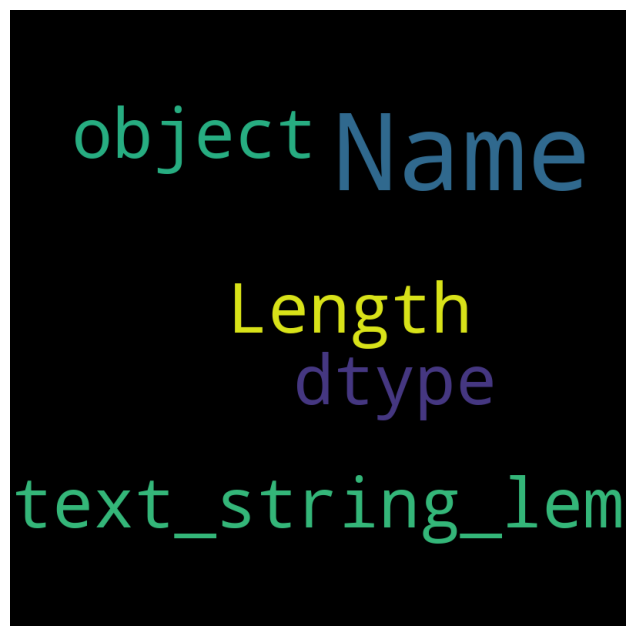

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stopwords, max_words = 1000, min_font_size = 20).generate(str(df1['text_string_lem']))
#plot the word cloud
fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
# py -m pip install scikit-learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import ensemble 
from sklearn.metrics import classification_report, accuracy_score
#list of sentences
text = df1['description']
#instantiate the class
cv = CountVectorizer()
#tokenize and build vocab
cv.fit(text)
print(cv.vocabulary_)
#transform the text
vector = cv.transform(text)
print(vector.toarray())

text_vec = CountVectorizer().fit_transform(df1['description'])
X_train, X_test, y_train, y_test = train_test_split(text_vec, df1['host'], test_size = 0.90, random_state = 75, shuffle = True)

classifier = ensemble.GradientBoostingClassifier(
    n_estimators = 500, #how many decision trees to build
    learning_rate = 2.0, #learning rate
    max_depth = 500
)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

{'ossec': 278, 'agent': 26, 'disconnected': 116, 'host': 171, 'based': 57, 'anomaly': 32, 'detection': 110, 'event': 134, 'rootcheck': 334, 'integrity': 186, 'checksum': 74, 'changed': 68, 'cis': 76, 'benchmark': 60, 'for': 155, 'centos': 66, 'ensure': 128, 'default': 104, 'deny': 107, 'firewall': 152, 'policy': 297, 'status': 384, 'from': 157, 'not': 267, 'applicable': 34, 'to': 413, 'failed': 143, 'partition': 284, 'usage': 429, 'reached': 317, '100': 2, 'disk': 118, 'space': 376, 'monitor': 248, 'log': 216, 'file': 147, 'rotated': 336, 'auditd': 46, 'role': 332, 'access': 15, 'control': 90, 'rbac': 315, 'failure': 144, 'detected': 109, 'started': 382, 'listened': 210, 'ports': 299, 'netstat': 255, 'new': 256, 'port': 298, 'opened': 275, 'or': 277, 'closed': 78, 'attached': 40, 'usb': 430, 'storage': 386, 'device': 112, 'enables': 125, 'promiscuous': 307, 'mode': 244, 'added': 20, 'the': 407, 'system': 398, 'sshd': 379, 'authentication': 48, 'success': 389, 'pam': 283, 'login': 218, 

c:\Users\dpandian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dpandian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dpandian\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av